<a href="https://colab.research.google.com/github/ektamistry/ekta/blob/main/Whatsapp_chat_EDA_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 27.5 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=0ae89cc0a5f2cfdce3955acf18ff29d233c2913997c878350bae4e88ba81e603
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 2.6 MB/s 


In [ ]:
pip install urlextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from urlextract import URLExtract
from wordcloud import WordCloud



opening text file in read mode 

In [ ]:
file = open("/content/_chat.txt" , 'r', encoding='utf-8')
data = file.read()
print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## **PreProcessing**

In [ ]:
#spliting the data into dates and messages 
pattern= '\[[^\]]*\]'

messages = re.split(pattern , data)
print("messages :" , messages)

dates = re.findall(pattern  ,data)
print("dates : ", dates)

print(len(messages))
print(len(dates))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# removing square brackets form the string date
date=[]
for i in range(0,len(dates)):
  x = dates[i][1:]
  x = x[:-1]
  date.append(x)

date[1]

'01/01/21, 12:00:03 AM'

In [ ]:
del messages[0]

In [ ]:
# now in dates there are some dirty data 
#removing dirty data 
dates_index = []
for i in date:
  if not(len(i)>=19 and len(i)<=21):
    x = date.index(i)
    dates_index.append(x)
    del date[x]
    del messages[x]

print(len(date))
print(len(messages))
print(len(dates_index))

104078
104078
0


In [ ]:
#converting list of message and dates into datasets
df = pd.DataFrame({ 'date': date ,'user_message': messages})
# convert date type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %H:%M:%S %p')



In [ ]:
df

,date,user_message
0,2021-01-01 12:00:02,Shounak Deshmukh: HAPPY NEW YEAR BOIS 🙏🙏🙏\n
1,2021-01-01 12:00:03,Harshad Shah NMIMS: HAPPY NEW YEAR\n
2,2021-01-01 12:00:06,Brshank Negi NMIMS: _*Happy New Year 2021*_🥳👌...
3,2021-01-01 12:00:12,Harshad Shah NMIMS: ‎sticker omitted\n
4,2021-01-01 12:00:15,Aditya Acharya NMIMS: Chalo naya saal covid k...
...,...,...
104073,2021-12-31 01:26:50,Keval Shah NMIMS: Happy birthday @91706020707...
104074,2021-12-31 07:20:38,Manan Shah: Happy Birthday @917060207070 🥳🎉🎂\n
104075,2021-12-31 07:35:35,Disha Reddy : happy birthday @917060207070 !!\n
104076,2021-12-31 08:02:19,Yaashie Sabla: happy birthday @917060207070 !!\n


In [ ]:
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:  # user name
    users.append(entry[1])
    messages.append(" ".join(entry[2:]))
  else:
    users.append('group_notification')
    messages.append(entry[0])
print(users)
print(messages)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
gettime = []
for i in date:
  y = i[-2:]
  gettime.append(y)



In [ ]:
# making dataset more presice 
df['user'] = users
df['message'] = messages
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second
df['am,pm'] = gettime

In [ ]:
df.head(200)

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,second,"am,pm",emoji
0,2021-01-01 12:00:02,Shounak Deshmukh: HAPPY NEW YEAR BOIS 🙏🙏🙏\n,Shounak Deshmukh,HAPPY NEW YEAR BOIS 🙏🙏🙏\n,2021-01-01,2021,1,January,1,Friday,12,0,2,AM,"[🙏, 🙏, 🙏]"
1,2021-01-01 12:00:03,Harshad Shah NMIMS: HAPPY NEW YEAR\n,Harshad Shah NMIMS,HAPPY NEW YEAR\n,2021-01-01,2021,1,January,1,Friday,12,0,3,AM,[]
2,2021-01-01 12:00:06,Brshank Negi NMIMS: _*Happy New Year 2021*_🥳👌...,Brshank Negi NMIMS,_*Happy New Year 2021*_🥳👌🏼\n‎,2021-01-01,2021,1,January,1,Friday,12,0,6,AM,[🥳]
3,2021-01-01 12:00:12,Harshad Shah NMIMS: ‎sticker omitted\n,Harshad Shah NMIMS,‎sticker omitted\n,2021-01-01,2021,1,January,1,Friday,12,0,12,AM,[]
4,2021-01-01 12:00:15,Aditya Acharya NMIMS: Chalo naya saal covid k...,Aditya Acharya NMIMS,Chalo naya saal covid ke naam\n,2021-01-01,2021,1,January,1,Friday,12,0,15,AM,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021-01-03 09:49:33,Suvaditya Mukherjee: no\n,Suvaditya Mukherjee,no\n,2021-01-03,2021,1,January,3,Sunday,9,49,33,PM,[]
196,2021-01-03 09:49:34,Suvaditya Mukherjee: changed\n,Suvaditya Mukherjee,changed\n,2021-01-03,2021,1,January,3,Sunday,9,49,34,PM,[]
197,2021-01-03 09:49:37,Suvaditya Mukherjee: liv\n‎,Suvaditya Mukherjee,liv\n‎,2021-01-03,2021,1,January,3,Sunday,9,49,37,PM,[]
198,2021-01-03 09:49:50,Viraj Patil NMIMS: ‎image omitted\n,Viraj Patil NMIMS,‎image omitted\n,2021-01-03,2021,1,January,3,Sunday,9,49,50,PM,[]


In [ ]:
x = df[ (df['message'] == "‎sticker omitted\n") | (df['message'] == "‎image omitted\n") | (df['message'] == "‎This message was deleted\n")].index
df.drop(x , inplace=True)
df.head(200)

,date,user_message,user,message,only_date,year,month_num,month,day,day_name,hour,minute,second,"am,pm",emoji
0,2021-01-01 12:00:02,Shounak Deshmukh: HAPPY NEW YEAR BOIS 🙏🙏🙏\n,Shounak Deshmukh,HAPPY NEW YEAR BOIS 🙏🙏🙏\n,2021-01-01,2021,1,January,1,Friday,12,0,2,AM,"[🙏, 🙏, 🙏]"
1,2021-01-01 12:00:03,Harshad Shah NMIMS: HAPPY NEW YEAR\n,Harshad Shah NMIMS,HAPPY NEW YEAR\n,2021-01-01,2021,1,January,1,Friday,12,0,3,AM,[]
2,2021-01-01 12:00:06,Brshank Negi NMIMS: _*Happy New Year 2021*_🥳👌...,Brshank Negi NMIMS,_*Happy New Year 2021*_🥳👌🏼\n‎,2021-01-01,2021,1,January,1,Friday,12,0,6,AM,[🥳]
4,2021-01-01 12:00:15,Aditya Acharya NMIMS: Chalo naya saal covid k...,Aditya Acharya NMIMS,Chalo naya saal covid ke naam\n,2021-01-01,2021,1,January,1,Friday,12,0,15,AM,[]
5,2021-01-01 12:00:15,Saransh Batnagar: Happy New year 🎉🎉\n,Saransh Batnagar,Happy New year 🎉🎉\n,2021-01-01,2021,1,January,1,Friday,12,0,15,AM,"[🎉, 🎉]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021-01-03 10:11:20,Drashti Magia: ooof\n,Drashti Magia,ooof\n,2021-01-03,2021,1,January,3,Sunday,10,11,20,PM,[]
213,2021-01-03 10:11:39,Drashti Magia: guys math mei kya sub question...,Drashti Magia,guys math mei kya sub questions wagerah hoge\n,2021-01-03,2021,1,January,3,Sunday,10,11,39,PM,[]
214,2021-01-03 10:11:43,Drashti Magia: substitute?\n,Drashti Magia,substitute?\n,2021-01-03,2021,1,January,3,Sunday,10,11,43,PM,[]
215,2021-01-03 10:11:51,Drashti Magia: further solve blah blah xyz?\n,Drashti Magia,further solve blah blah xyz?\n,2021-01-03,2021,1,January,3,Sunday,10,11,51,PM,[]


#Identifies all users

In [ ]:
users = df["user"].unique()
import spacy
from spacy import displacy
user = []
NER = spacy.load("en_core_web_sm")
for i in users:
  text1= NER(i)
  user.append(text1)  

user

[ Shounak Deshmukh,
  Harshad Shah NMIMS,
  Brshank Negi NMIMS,
  Aditya Acharya NMIMS,
  Saransh Batnagar,
  Shireen,
  Shreyas Dongre,
  Jay Malanker,
  Aaryadev Chandra NMIMS,
  Drashti Magia,
  Aryan Malviya,
  Suvaditya Mukherjee,
  Nihaal Raichura,
  Sahil Patki,
  Hansin patwa,
  Yaashie Sabla,
  Aniruddh Kulkarni,
  Aryan Pasha,
  Mansi Pavaskar NMIMS,
  Raksheet Jain,
  Viraj Patil NMIMS,
  Shaunak Joshi,
  Devesh Pawar NMIMS,
  Anjna Gupta,
  Nishil Tayal,
  Diya Karia,
  sohamsinghal,
  Vishan Oberoi,
  Prisha ,
  Gautam Padhi,
  Aditya Patankar,
  Aaryan Pasha,
  Dev Chandan NMIMS,
  Disha Reddy ,
  Aayan ,
  ‪+91 88799 93048‬,
  Maitri Shah NMIMS,
  Raj Thakar ,
  Abhinav Rastogi,
  Krisha Chemburkar,
  nubair kalsekar,
  Divyata Shah ,
  Vishesh Mehta,
 group_notification,
  ‪+91 99877 44228‬,
  Raed ,
  Ratnam Zanwar,
  Karan Manikarni,
  Manan Shah,
  Shrusthi,
  Ekta Mistry,
  Rohit Raval,
  Priyanka Kitur NMIMS,
  Dharmik Shetty,
  Shwetha Ajay,
  Ayush Modi,
  Raghav

# Number of message sent by the particular user in the group 

In [ ]:
# dataframe contain users name and the number of message sent by the user
df2 = df.groupby('user').count()['message'].reset_index()


auth = df2.groupby("user").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="user", x="message", color='user', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )
fig.show()

# Most Happning day 

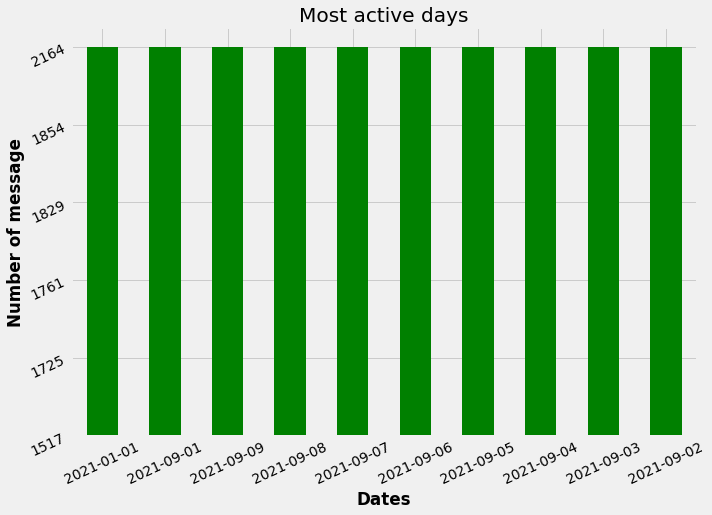

In [ ]:
timeline = df.groupby('only_date').count()['message'].reset_index()

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


f, g = plt.subplots(figsize=(10,7))
timeline['only_date'].value_counts().head(10).plot.bar(color="green")
g.set_xlabel('Dates', fontweight ='bold')
g.set_xticklabels(g.get_xticklabels(), rotation=25)
g.set_ylabel('Number of message', fontweight ='bold')
x = []
for i in timeline.message:
  x.append(i)
  x.sort()
  x = x[-6:]
g.set_yticklabels(x, rotation=25)
plt.title("Most active days")
plt.show(g)



# Selecting user for further analysis 

In [ ]:
print("users :  ", user , "Overall"  )
selected_user = input("select user from the above names OR you can select the whole chat ")
print("you have selected : " , selected_user)

users :   [ Shounak Deshmukh,  Harshad Shah NMIMS,  Brshank Negi NMIMS,  Aditya Acharya NMIMS,  Saransh Batnagar,  Shireen,  Shreyas Dongre,  Jay Malanker,  Aaryadev Chandra NMIMS,  Drashti Magia,  Aryan Malviya,  Suvaditya Mukherjee,  Nihaal Raichura,  Sahil Patki,  Hansin patwa,  Yaashie Sabla,  Aniruddh Kulkarni,  Aryan Pasha,  Mansi Pavaskar NMIMS,  Raksheet Jain,  Viraj Patil NMIMS,  Shaunak Joshi,  Devesh Pawar NMIMS,  Anjna Gupta,  Nishil Tayal,  Diya Karia,  sohamsinghal,  Vishan Oberoi,  Prisha ,  Gautam Padhi,  Aditya Patankar,  Aaryan Pasha,  Dev Chandan NMIMS,  Disha Reddy ,  Aayan ,  ‪+91 88799 93048‬,  Maitri Shah NMIMS,  Raj Thakar ,  Abhinav Rastogi,  Krisha Chemburkar,  nubair kalsekar,  Divyata Shah ,  Vishesh Mehta, group_notification,  ‪+91 99877 44228‬,  Raed ,  Ratnam Zanwar,  Karan Manikarni,  Manan Shah,  Shrusthi,  Ekta Mistry,  Rohit Raval,  Priyanka Kitur NMIMS,  Dharmik Shetty,  Shwetha Ajay,  Ayush Modi,  Raghav Jeendgar,  Shradha NMIMS,  Sidharth Jariyal N

 - Number of Message sent in the group
 - Total Number of words used in in the group
 - Number of Media Message sent in the group 




In [ ]:
# fetch all the messages
messages_group = df["message"]

# fetch the number of messages
num_messages_group = df.shape[0]

# fetch the total number of words
words_group = []
for message in df['message']:
  words_group.extend(message.split())

# fetch number of media messages
num_media_messages_group = df[df['message'] == '<Media omitted>\n'].shape[0]

print("Number of Message sent in the group : " , num_messages_group)
print("Total Number of words used in the group : " , len(words_group))
print("Number of Media Message sent in the group : " , num_media_messages_group)



Number of Message sent in the group :  99388
Total Number of words used in the group :  433702
Number of Media Message sent in the group :  0


 - Number of Message sent by the user 
 - Total Number of words used in Message sent by the user
 - Number of Media Message sent by the user 




In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

# fetch all the messages
messages_user = df_user["message"]

# fetch the number of messages
num_messages_user = df_user.shape[0]

# fetch the total number of words
words_user = []
for message in df_user['message']:
  words_user.extend(message.split())

# fetch number of media messages
num_media_messages_user = df_user[df_user['message'] == '<Media omitted>\n'].shape[0]

print("Number of Message sent by " ,selected_user ,": " , num_messages_user)
print("Total Number of words used in Message sent by " ,selected_user ,": " , len(words_user))
print("Number of Media Message sent by" ,selected_user ,":" , num_media_messages_user)



Number of Message sent by   Brshank Negi NMIMS :  4333
Total Number of words used in Message sent by   Brshank Negi NMIMS :  14155
Number of Media Message sent by  Brshank Negi NMIMS : 0


EMOJI 

Number or Emoji used in the group chat 

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
def split_count(text):
    emoji_list_group = []
    data = regex.findall(r'\X',text)

    for word in data:
        emojis_group = emoji.distinct_emoji_list(word)
        if any(char in emojis_group for char in word):
            emoji_list_group.append(word)
    return emoji_list_group
    
df['emoji'] = df["message"].apply(split_count)

emojis_group = sum(df['emoji'].str.len())
print("Number of emoji used Number or Emoji used in the group chat :" ,emojis_group)

Number of emoji used Number or Emoji used in the group chat : 118565


Number or Emoji used by the user 

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
def split_count(text):
    emoji_list_user = []
    data = regex.findall(r'\X',text)

    for word in data:
        emojis_user = emoji.distinct_emoji_list(word)
        if any(char in emojis_user for char in word):
            emoji_list_user.append(word)
    return emoji_list_user
    
df_user['emoji'] = df_user["message"].apply(split_count)

emojis_user = sum(df_user['emoji'].str.len())
print("Number of emoji used by " ,selected_user ,":" ,emojis_user)

Number of emoji used by   Brshank Negi NMIMS : 1274


# Emojis and the frequency of the emoji used in the group chat

In [ ]:
total_emoji_list_group = list([a for b in df.emoji for a in b])
emoji_dict_group = dict(Counter(total_emoji_list_group))
emoji_dict_group = sorted(emoji_dict_group.items() ,key = lambda x : x[1] , reverse = True)
print("Emojis and the frequency of the emoji used in the group chat")
for i in emoji_dict_group:
    print(i)

Emojis and the frequency of the emoji used in the group chat
('😂', 93759)
('🥳', 1666)
('😭', 1325)
('🙏', 1276)
('🎉', 1061)
('✨', 976)
('👀', 862)
('🤣', 741)
('👍', 677)
('😳', 601)
('🥰', 572)
('🥺', 521)
('🔥', 497)
('\U0001f9be', 459)
('\U0001f972', 444)
('🥵', 400)
('😴', 344)
('🤮', 338)
('🤔', 336)
('🍆', 317)
('🤩', 309)
('💯', 300)
('😁', 280)
('😅', 270)
('🎊', 270)
('😡', 247)
('😘', 240)
('🎂', 239)
('🤯', 227)
('🤢', 210)
('😍', 209)
('🙃', 201)
('🙂', 199)
('👌', 197)
('😒', 193)
('😞', 183)
('🔫', 181)
('😄', 170)
('💀', 167)
('🥂', 162)
('🤠', 161)
('💄', 161)
('😈', 157)
('💋', 156)
('💩', 155)
('👹', 154)
('👺', 153)
('👣', 152)
('🦷', 152)
('\U0001f9bf', 152)
('👿', 152)
('😤', 147)
('😔', 127)
('😢', 120)
('😌', 100)
('\U0001f971', 93)
('🤤', 93)
('😎', 93)
('🌚', 91)
('🍾', 89)
('🔗', 84)
('💫', 74)
('😊', 71)
('🤡', 70)
('😆', 69)
('🗓', 64)
('🙄', 63)
('😩', 61)
('🤝', 57)
('😉', 57)
('📍', 56)
('😠', 54)
('😬', 53)
('💪', 52)
('💥', 50)
('🥴', 49)
('👏', 47)
('⏰', 46)
('🌟', 45)
('😱', 44)
('🥁', 44)
('😶', 43)
('😃', 41)
('😇', 41)
('

# Emojis and the frequency of the emoji used by the user  

In [ ]:
total_emoji_list_user = list([a for b in df_user.emoji for a in b])
emoji_dict_user = dict(Counter(total_emoji_list_user))
emoji_dict_user = sorted(emoji_dict_user.items() ,key = lambda x : x[1] , reverse = True)
print("Emojis and the frequency of the emoji used by " ,selected_user )
for i in emoji_dict_user:
    print(i)

Emojis and the frequency of the emoji used by   Brshank Negi NMIMS
('😂', 649)
('👍', 93)
('🔥', 78)
('🎉', 69)
('🙏', 58)
('💯', 29)
('🤣', 26)
('🥳', 22)
('👌', 22)
('👀', 19)
('😭', 16)
('🎂', 11)
('💛', 8)
('👏', 8)
('✨', 8)
('😆', 7)
('😊', 6)
('😎', 6)
('✅', 6)
('🍻', 6)
('😀', 5)
('🎇', 5)
('🤯', 4)
('🆗', 4)
('🎁', 4)
('🌜', 4)
('🤝', 4)
('🎊', 4)
('\U0001f9ca', 3)
('😇', 3)
('🤩', 3)
('🔪', 3)
('💪', 3)
('🧠', 3)
('😘', 3)
('🥰', 3)
('😳', 3)
('👂', 2)
('\U0001f972', 2)
('📝', 2)
('🔗', 2)
('❗️', 2)
('🎈', 2)
('🤗', 2)
('🌛', 2)
('❎', 2)
('😬', 1)
('😫', 1)
('🙉', 1)
('👆', 1)
('🙈', 1)
('😍', 1)
('😤', 1)
('🦌', 1)
('😁', 1)
('🌞', 1)
('🐒', 1)
('🔴', 1)
('😌', 1)
('😅', 1)
('🤪', 1)
('🖋', 1)
('🥜', 1)
('🚗', 1)
('🥺', 1)
('☕', 1)
('😒', 1)
('😩', 1)
('💢', 1)
('✋', 1)
('🤚', 1)
('🥶', 1)
('😏', 1)
('💐', 1)
('🦆', 1)
('💩', 1)
('🙂', 1)
('🦎', 1)
('📌', 1)
('😡', 1)
('💦', 1)
('💀', 1)
('🔇', 1)
('🚁', 1)
('💫', 1)
('😐', 1)
('😉', 1)
('👉', 1)
('🧢', 1)
('\U0001fa94', 1)
('🍹', 1)
('🙌', 1)
('🌟', 1)
('💃', 1)


# Average Words per Message used in the group chat 

In [ ]:
#Finding Average Words per Message
wordsPerMessage_group = len(words_group)/num_messages_group
wordsPerMessage_group= ("%.3f" % round(wordsPerMessage_group, 2))  
print('Average Words per Message used in the group chat  : ', wordsPerMessage_group)

Average Words per Message used in the group chat  :  4.360


# Average Words per Message used by the users 

In [ ]:
#Finding Average Words per Message
wordsPerMessage_user = len(words_user)/num_messages_user
wordsPerMessage_user= ("%.3f" % round(wordsPerMessage_user, 2))  
print('Average Words per Message sent by" ,selected_user ,": ', wordsPerMessage_user)

Average Words per Message sent by" ,selected_user ,":  3.270


# Wordcloud for the group

Wordcloud for the whole group


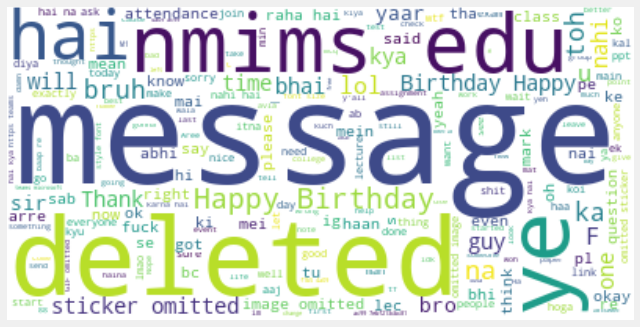

In [ ]:
text = ' '.join(review for review in df.message)
stopwords = set(STOPWORDS)
    
#Generate a wordcloud image 
print('Wordcloud for the whole group')
    
#Generate a wordcloud Image 
wordcloud = WordCloud(stopwords= stopwords , background_color = 'white').generate(text)

#Display the generated image 
plt.figure(figsize = (10,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Wordcloud for the user

 WordCloud of  Brshank Negi NMIMS


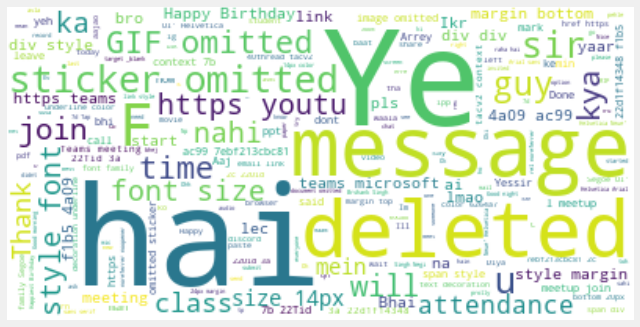

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
  
text = ' '.join(review for review in df_user.message)
stopwords = set(STOPWORDS)
    
#Generate a wordcloud image 
print(' WordCloud of' , selected_user)
    
#Generate a wordcloud Image 
wordcloud = WordCloud(stopwords= stopwords , background_color = 'white').generate(text)

#Display the generated image 
plt.figure(figsize = (10,15))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

5 Most Common words used by the user 

In [ ]:
# this was not working because colab was not allowing big file for iteratioin it was showing time out 
"""import io 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter
import nltk
import spacy
import re
import string

text = " ".join(r for r in df.message)
text = text.split(" ")
Text = []

for i in text :
  #text the corpus to lower case
  i = i.lower()
  #substituting digit by space
  i = re.sub(r'\d+',' ',i)
  #removing punctuation marks
  i = i.translate(str.maketrans("","",string.punctuation ))
  text.append(i)

#stop word removel 
from nltk.tokenize import word_tokenize
from pprint import pprint # used for beautifying the print text
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
#initialize stopwords 
stop_words = set(stopwords.words('english')) 
for r in words: 
    if not r in stop_words: 
      Text.append(r)


# Pass the Text list to instance of Counter class.
Counter = Counter(Text)  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(5)
print(most_occur)"""




In [ ]:
# making a new dataset for further anaylsis 
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

timeline_user = df_user.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time_user = []
for i in range(timeline_user.shape[0]):
  time_user.append(timeline_user['month'][i] + "-" + str(timeline_user['year'][i]))

timeline_user['time'] = time_user
print(selected_user ," database")
timeline_user
 

 Brshank Negi NMIMS  database


,year,month_num,month,message,time
0,2021,1,January,578,January-2021
1,2021,2,February,378,February-2021
2,2021,3,March,780,March-2021
3,2021,4,April,473,April-2021
4,2021,5,May,379,May-2021
5,2021,6,June,11,June-2021
6,2021,7,July,388,July-2021
7,2021,8,August,478,August-2021
8,2021,9,September,279,September-2021
9,2021,10,October,427,October-2021


In [ ]:
timeline_group = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time_group  = []
for i in range(timeline_group .shape[0]):
  time_group .append(timeline_group ['month'][i] + "-" + str(timeline_group ['year'][i]))

timeline_group ['time'] = time_group 
print("Group database")
timeline_group 
 

Group database


,year,month_num,month,message,time
0,2021,1,January,15184,January-2021
1,2021,2,February,7398,February-2021
2,2021,3,March,20420,March-2021
3,2021,4,April,22019,April-2021
4,2021,5,May,8850,May-2021
5,2021,6,June,425,June-2021
6,2021,7,July,8122,July-2021
7,2021,8,August,7321,August-2021
8,2021,9,September,3233,September-2021
9,2021,10,October,3834,October-2021


# Number of message sent in the group on daily basis

In [ ]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
print("Number of message sent in the group on daily basis")
daily_timeline

Number of message sent in the group on daily basis


,only_date,message
0,2021-01-01,89
1,2021-01-02,69
2,2021-01-03,121
3,2021-01-04,559
4,2021-01-05,231
...,...,...
339,2021-12-27,1
340,2021-12-28,2
341,2021-12-29,10
342,2021-12-30,36


# Number of message sent by the user on daily basis

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

daily_timeline_user = df_user.groupby('only_date').count()['message'].reset_index()
print("Number of message sent by" ,selected_user ," on daily basis")
daily_timeline_user

Number of message sent by  Brshank Negi NMIMS  on daily basis


,only_date,message
0,2021-01-01,4
1,2021-01-02,6
2,2021-01-04,30
3,2021-01-05,15
4,2021-01-06,1
...,...,...
264,2021-12-23,6
265,2021-12-24,2
266,2021-12-25,1
267,2021-12-26,3



# Number of message sent in the group on weekly basis

In [ ]:
print("Number of message sent in the group on weekly basis")
print(df['day_name'].value_counts())


Number of message sent in the group on weekly basis
Friday       17477
Monday       16324
Tuesday      16214
Wednesday    14693
Thursday     14215
Saturday     13234
Sunday        7231
Name: day_name, dtype: int64



# Number of message sent by the user on weekly basis

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
print("Number of message sent by the user on weekly basis")
print(df_user['day_name'].value_counts())

Number of message sent by the user on weekly basis
Tuesday      910
Friday       820
Monday       686
Thursday     652
Wednesday    596
Saturday     467
Sunday       202
Name: day_name, dtype: int64


# Number of message sent in the group on monthly basis

In [ ]:
print("Number of message sent in the group on monthly basis")
print(df['month'].value_counts())

Number of message sent in the group on monthly basis
April        22019
March        20420
January      15184
May           8850
July          8122
February      7398
August        7321
October       3834
September     3233
December      1851
November       731
June           425
Name: month, dtype: int64


# Number of message sent by the user on monthly basis

In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
print("Number of message sent by the user on monthly basis")
print(df_user['month'].value_counts())

Number of message sent by the user on monthly basis
March        780
January      578
August       478
April        473
October      427
July         388
May          379
February     378
September    279
December     135
November      27
June          11
Name: month, dtype: int64


In [ ]:
#activity_heatmap  group
user_heatmap = df.pivot_table(index='day_name', columns='am,pm', values='message', aggfunc='count').fillna(0)
print("For group")
user_heatmap

For group


"am,pm",AM,PM
day_name,,
Friday,6319,11158
Monday,6778,9546
Saturday,6094,7140
Sunday,1575,5656
Thursday,4185,10030
Tuesday,5006,11208
Wednesday,4529,10164


In [ ]:
#activity_heatmap
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

user_heatmap_user = df_user.pivot_table(index='day_name', columns='am,pm', values='message', aggfunc='count').fillna(0)
print("For" , selected_user)
user_heatmap_user

For  Brshank Negi NMIMS


"am,pm",AM,PM
day_name,,
Friday,242,578
Monday,390,296
Saturday,206,261
Sunday,70,132
Thursday,230,422
Tuesday,312,598
Wednesday,181,415


# more graphical day wise distribution of whole group 

In [ ]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(df["message"])
day_df['day_of_date'] = df['date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

#Number of messages in the group as times move on 



In [ ]:
date_df = daily_timeline.groupby("only_date").sum()
date_df.reset_index(inplace=True)
print("For the Whole Group ")
fig = px.line(date_df, x="only_date", y="message")
fig.update_xaxes(nticks=20)
fig.show()


For the Whole Group 


#Number of messages sent by the user as times move on



In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]

date_df_user = daily_timeline_user.groupby("only_date").sum()
date_df_user.reset_index(inplace=True)
print("For",selected_user)
fig = px.line(date_df_user, x="only_date", y="message")
fig.update_xaxes(nticks=20)
fig.show()


For  Brshank Negi NMIMS


# Sentiment analysis of the whole group 

In [ ]:
df_SA = pd.DataFrame(df, columns=["only_date",  'message'])

data = df_SA.dropna()

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["message"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


    only_date                          message  Positive  Negative  Neutral
0  2021-01-01        HAPPY NEW YEAR BOIS 🙏🙏🙏\n     0.526       0.0    0.474
1  2021-01-01                 HAPPY NEW YEAR\n     0.649       0.0    0.351
2  2021-01-01    _*Happy New Year 2021*_🥳👌🏼\n‎     0.000       0.0    1.000
4  2021-01-01  Chalo naya saal covid ke naam\n     0.000       0.0    1.000
5  2021-01-01              Happy New year 🎉🎉\n     0.552       0.0    0.448


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("The sentiment of the whole group  is Positive")
    elif (b>a) and (b>c):
        print("The sentiment of the whole group is Negative")
    else:
        print("The sentiment of the whole group is Neutral")
sentiment_score(x, y, z)

The sentiment of the whole group is Neutral


# Sentiment analysis of the user 





In [ ]:
if selected_user != 'Overall':
  df_user = df[df['user'] == selected_user]
df_SA_user = pd.DataFrame(df_user, columns=["only_date",  'message'])

data = df_SA_user.dropna()

import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["message"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["message"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["message"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      only_date                                            message  Positive  \
2    2021-01-01                      _*Happy New Year 2021*_🥳👌🏼\n‎       0.0   
63   2021-01-01  When was the last time you listened to A.D.H.D.\n       0.0   
64   2021-01-01                                Man time flies by\n       0.0   
66   2021-01-01                                ‎sticker omitted\n‎       0.0   
104  2021-01-02                                                F\n       0.0   

     Negative  Neutral  
2         0.0      1.0  
63        0.0      1.0  
64        0.0      1.0  
66        0.0      1.0  
104       0.0      0.0  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("The sentiment of" ,selected_user ," is Positive")
    elif (b>a) and (b>c):
        print("The sentiment of" ,selected_user ," is Negative")
    else:
        print("The sentiment of" ,selected_user ," is Neutral")
sentiment_score(x, y, z)

The sentiment of  Brshank Negi NMIMS  is Neutral


conclusion 


It was fun to compare various statistics with your friends and have friendly banter with them in regard to who is starting more messages and sending more messages.
It made me realize that a lot of insights can be dug up from just a single chat. On analyzing a few chats of a single person, it is quite easy to figure out the messaging pattern of the individual by checking the time at which he normally sends messages in the morning and evening and in turn their sleeping pattern. 



Working on such data made us realize how valuable data we give away to the companies when we are using their products.

In [ ]:
!jupyter nbconvert --to html /content/NLP_project_I064_I070_I084.ipynb

[NbConvertApp] Converting notebook /content/NLP_project_I064_I070_I084.ipynb to html
[NbConvertApp] Writing 1133525 bytes to /content/NLP_project_I064_I070_I084.html
